In [1]:
#Tất cả các thư viện được sử dụng trong project này

import numpy as np
import pandas as pd
import seaborn as sns
sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,15))
sns.set_style('darkgrid')
pd.set_option('display.max_columns',0)
pd.set_option('display.max_rows',100)
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pylab as pylab
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge, SGDRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics

<Figure size 1500x1500 with 0 Axes>

In [2]:
data = pd.read_csv("diamonds.csv")

In [3]:
data.shape

(53940, 11)

In [4]:
#Bộ data này có 53940 dòng, 11 cột và 10 features
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [5]:
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


##DATA CLEANING
Encoding


In [6]:
#loại bỏ cột đầu tiên là index không cần thiết
data = data.drop(["Unnamed: 0"], axis=1)

In [7]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [8]:
''' loại bỏ biến không có chiều (làm tắt)
data = data.drop(data[data["x"]==0].index)
data = data.drop(data[data["y"]==0].index)
data = data.drop(data[data["z"]==0].index)
data.shape'''

' loại bỏ biến không có chiều (làm tắt)\ndata = data.drop(data[data["x"]==0].index)\ndata = data.drop(data[data["y"]==0].index)\ndata = data.drop(data[data["z"]==0].index)\ndata.shape'

mất 20 điểm dữ liệu khi xóa các viên kim cương không thứ nguyên (2-D hoặc 1-D).

In [9]:
# Kiểm tra giá trị 0, null

In [10]:
print("Number of rows with x == 0: {} ".format((data.x==0).sum()))
print("Number of rows with y == 0: {} ".format((data.y==0).sum()))
print("Number of rows with z == 0: {} ".format((data.z==0).sum()))
print("Number of rows with depth == 0: {} ".format((data.depth==0).sum()))

Number of rows with x == 0: 8 
Number of rows with y == 0: 7 
Number of rows with z == 0: 20 
Number of rows with depth == 0: 0 


In [11]:
data[['x','y','z']] = data[['x','y','z']].replace(0,np.NaN)
data.isnull().sum()

carat       0
cut         0
color       0
clarity     0
depth       0
table       0
price       0
x           8
y           7
z          20
dtype: int64

In [12]:
data.dropna(inplace=True)
data.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

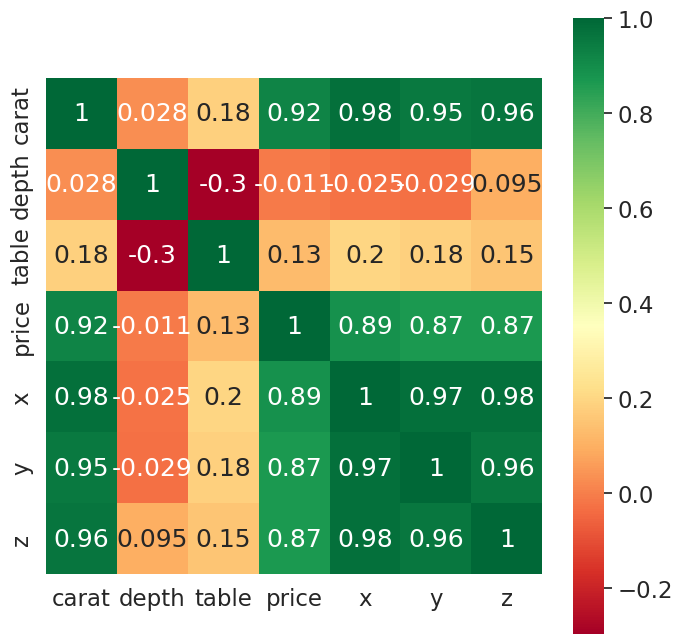

In [13]:
#Khám phá dữ liệu univariate
plt.figure(figsize=(8,8))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(data.corr(), annot=True,cmap='RdYlGn',square=True)  # seaborn has very simple solution for heatmap

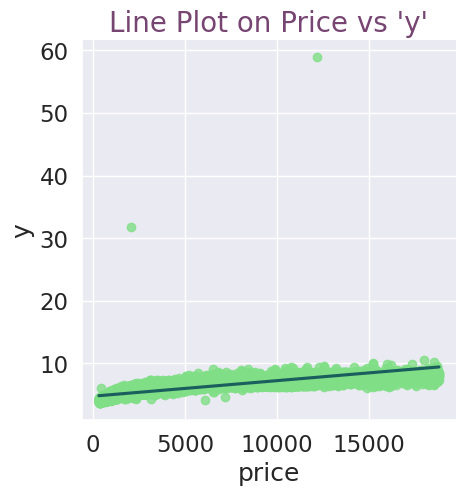

In [14]:
lm = sns.lmplot(x="price", y="y", data=data, scatter_kws={"color": "#80DF86"}, line_kws={"color": "#1A5F5D"})
plt.title("Line Plot on Price vs 'y'", color="#774571", fontsize = 20)
plt.show()

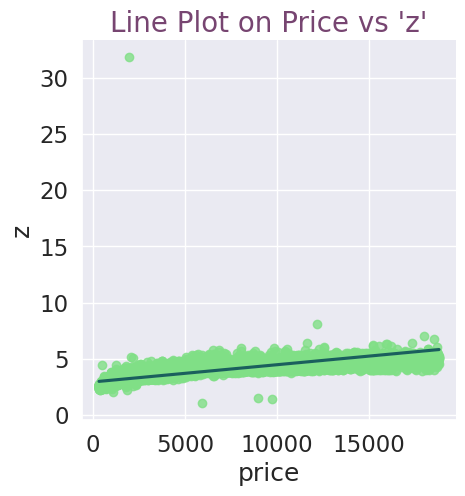

In [15]:
lm = sns.lmplot(x="price", y="z", data=data, scatter_kws={"color": "#80DF86"}, line_kws={"color": "#1A5F5D"})
plt.title("Line Plot on Price vs 'z'", color="#774571", fontsize = 20)
plt.show()

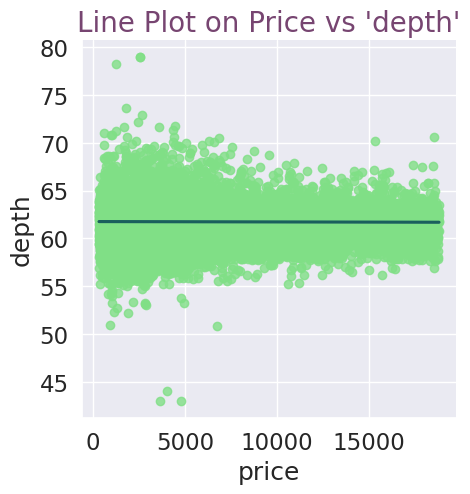

In [16]:
lm = sns.lmplot(x="price", y="depth", data=data, scatter_kws={"color": "#80DF86"}, line_kws={"color": "#1A5F5D"})
plt.title("Line Plot on Price vs 'depth'", color="#774571", fontsize = 20)
plt.show()

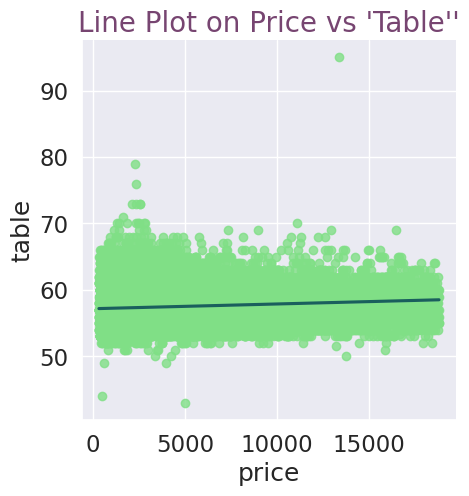

In [17]:
lm = sns.lmplot(x="price", y="table", data=data, scatter_kws={"color": "#80DF86"}, line_kws={"color": "#1A5F5D"})
plt.title("Line Plot on Price vs 'Table''", color="#774571", fontsize = 20)
plt.show()

In [18]:
# loại bỏ outliers
data = data[(data["depth"]<75)&(data["depth"]>45)]
data = data[(data["table"]<80)&(data["table"]>40)]
data = data[(data["x"]<30)]
data = data[(data["y"]<30)]
data = data[(data["z"]<30)&(data["z"]>2)]
data.shape

(53907, 10)

##visual

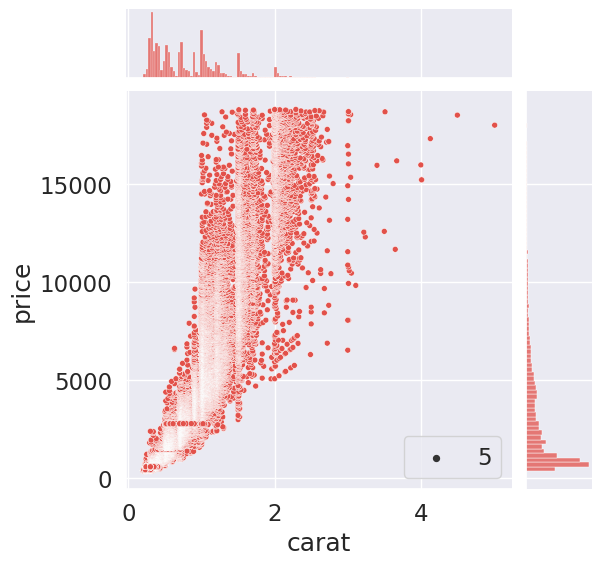

In [19]:
sns.jointplot(x='carat' , y='price' , data=data , size=5)

Carat đề cập đến Trọng lượng của Đá chứ không phải Kích thước.
Trọng lượng của một viên kim cương có tác động đáng kể nhất đến giá của nó.
Vì Viên đá càng lớn thì càng hiếm nên một viên Kim cương 2 carat sẽ đắt hơn Tổng giá của hai viên kim cương 1 carat có cùng chất lượng.
Carat của một viên kim cương thường rất quan trọng đối với mọi người khi mua sắm. Nhưng sẽ là một sai lầm nếu hy sinh quá nhiều chất lượng cho kích thước tuyệt đối.

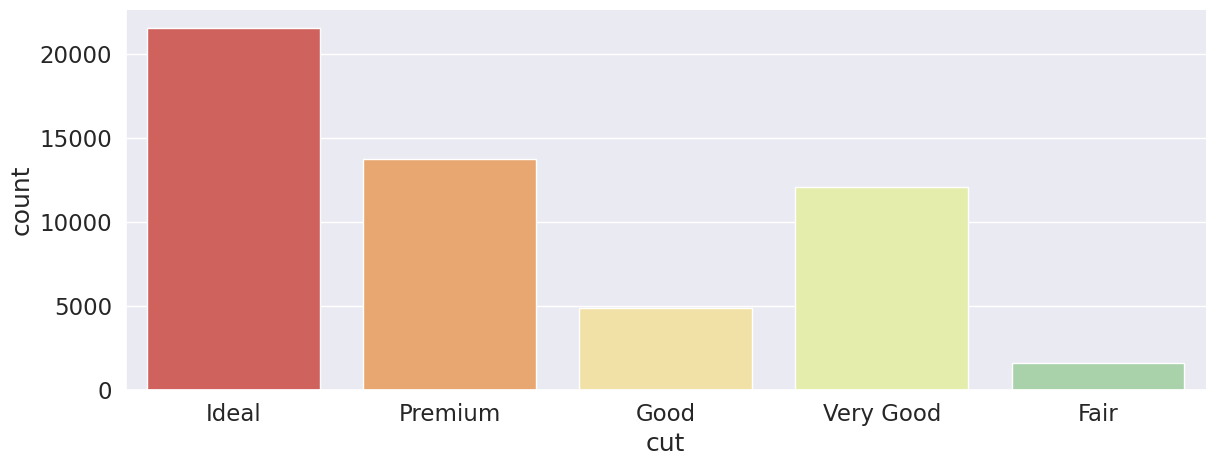

In [20]:
sns.catplot(x='cut', data=data, kind='count', aspect=2.5)
plt.show()

Mặc dù Trọng lượng Carat của một viên kim cương có tác động mạnh nhất đến giá cả, việc cắt vẫn có thể làm tăng hoặc giảm giá trị của nó một cách đáng kể.
Với chất lượng cắt cao hơn, giá mỗi carat của viên kim cương sẽ tăng lên.
Điều này là do Đá Thô có mức lãng phí cao hơn vì cần phải loại bỏ nhiều Vật liệu hơn để đạt được Tỷ lệ và Đối xứng tốt hơn.

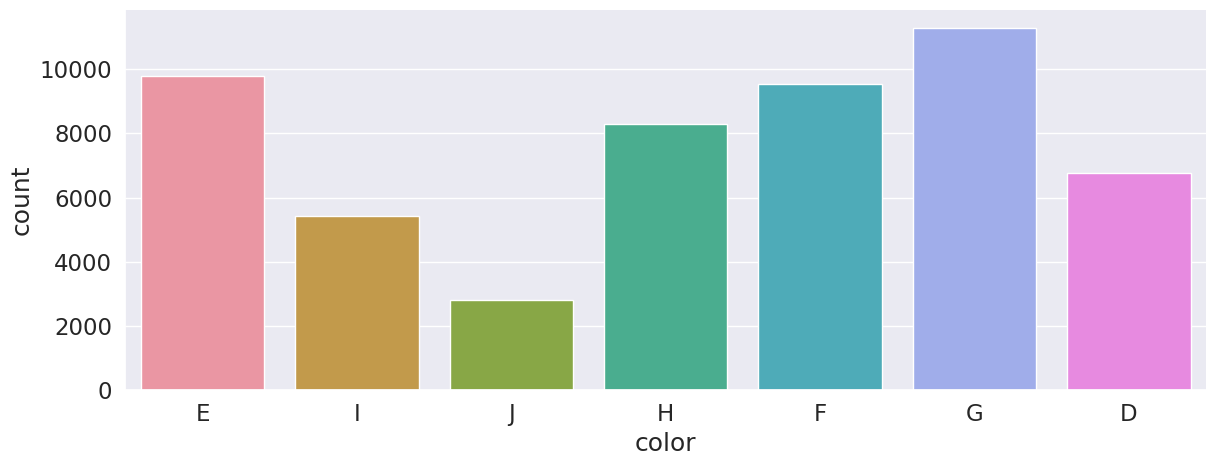

In [21]:
# màu sắc kim cương
import seaborn as sns
sns.catplot(x='color', data=data, kind='count', aspect=2.5)
plt.show()

Màu sắc của viên kim cương đề cập đến tông màu và độ bão hòa của màu sắc hoặc độ sâu của màu trong viên kim cương.
Màu sắc của viên kim cương có thể từ không màu đến màu vàng hoặc màu hơi nâu nhạt.
Kim cương không màu hiếm hơn và có giá trị hơn vì chúng trông trắng hơn và sáng hơn.

<Axes: xlabel='clarity', ylabel='price'>

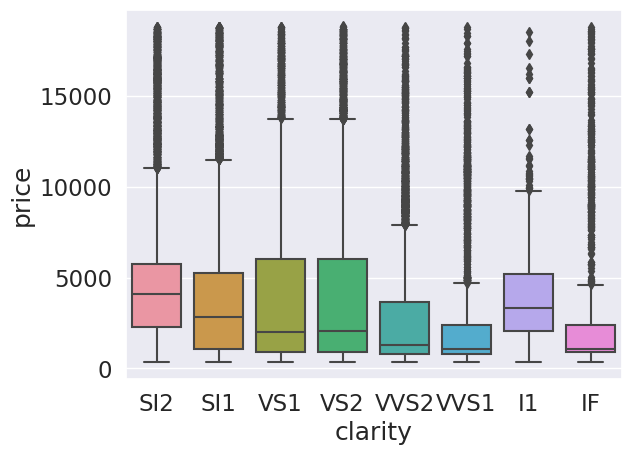

In [22]:
sns.boxplot(x='clarity', y='price', data=data )

Có vẻ như VS1 và VS2 ảnh hưởng đến Giá của viên Kim cương như nhau với biên
độ Giá khá cao

Độ trong của kim cương đề cập đến sự ít xuất hiện của các tạp chất và khuyết điểm.
bao gồm là không hoàn hảo nằm trong viên kim cương. Các tạp chất có thể là Vết nứt hoặc thậm chí là Khoáng chất hoặc Tinh thể nhỏ đã hình thành bên trong Viên kim cương.
Vết xước là kết quả của quá trình mài giũa và đánh bóng hơn là điều kiện môi trường nơi viên kim cương được hình thành. Nó bao gồm các vết trầy xước, các mặt phụ, v.v.

Encoding

In [23]:
# tạo bản sao để giữ nguyên bộ dữ liệu gốc
diamonds = data.copy()
# Encoding các cột có dữ liệu phân loại
columns = ['cut','color','clarity']
label_encoder = LabelEncoder()
for col in columns:
    data[col] = label_encoder.fit_transform(diamonds[col])
diamonds.describe()
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53907.000000,53907.000000,53907.000000,53907.000000,53907.000000,53907.000000,53907.000000
mean,0.797628,61.749741,57.455948,3930.584470,5.731463,5.733292,3.539441
std,0.473765,1.420119,2.226153,3987.202815,1.119384,1.111252,0.691434
min,0.200000,50.800000,43.000000,326.000000,3.730000,3.680000,2.060000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5322.000000,6.540000,6.540000,4.040000
max,5.010000,73.600000,79.000000,18823.000000,10.740000,10.540000,6.980000


Không có giá trị nào bị null hay thiếu

In [24]:
diamonds.describe(include='object')

,cut,color,clarity
count,53907,53907,53907
unique,5,7,8
top,Ideal,G,SI1
freq,21543,11282,13059


In [25]:
dict_cut      = dict((k,v) for v, k in enumerate(('Fair', 'Good', 'Very Good', 'Premium', 'Ideal')))
dict_color    = dict((k,v) for v, k in enumerate('DEFGHIJ'[::-1]))
dict_clarity  = dict((k,v) for v, k in enumerate(('I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF')))

In [26]:
for col in ['color','cut', 'clarity']:
    print(diamonds[col].value_counts())
    print('='*30)

G    11282
E     9792
F     9536
H     8296
D     6774
I     5420
J     2807
Name: color, dtype: int64
Ideal        21543
Premium      13779
Very Good    12080
Good          4902
Fair          1603
Name: cut, dtype: int64
SI1     13059
VS2     12250
SI2      9184
VS1      8167
VVS2     5066
VVS1     3654
IF       1790
I1        737
Name: clarity, dtype: int64


In [27]:
# Mã hoá chuyển đổi dạng số các thuộc tính 3 cột trên
diamonds.replace({'cut': dict_cut}, inplace=True)
diamonds.replace({'color': dict_color}, inplace=True)
diamonds.replace({'clarity': dict_clarity}, inplace=True)
diamonds[['cut','color','clarity']] = diamonds[['cut','color','clarity']].astype('category')
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,4,5,1,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,5,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,5,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,1,3,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,0,1,63.3,58.0,335,4.34,4.35,2.75


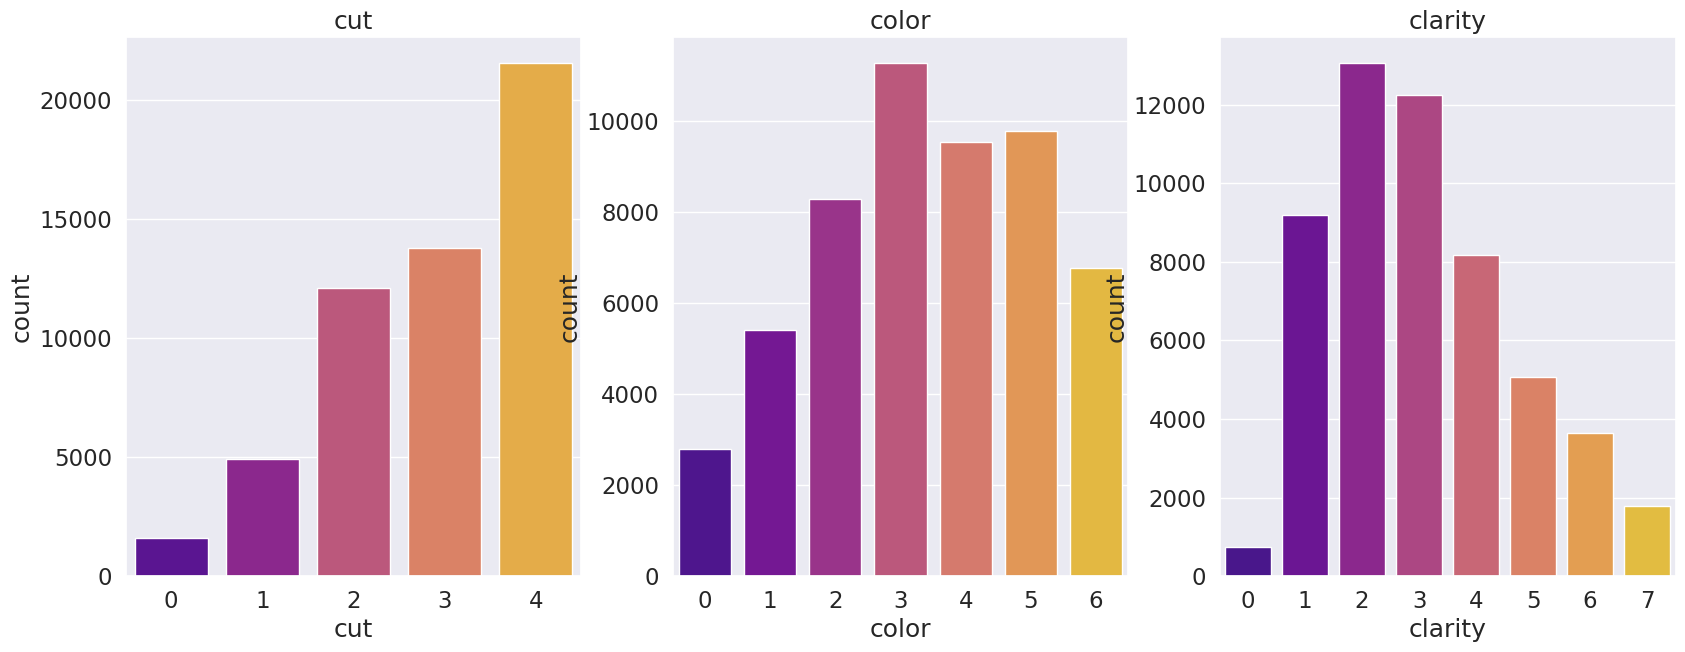

In [28]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,7))
idx = 0
for i in ['cut', 'color', 'clarity']:
    sns.countplot(data=diamonds, x=i,palette='plasma' , ax=axes[idx]).set_title(i)
    idx += 1
plt.show()

Số đếm càng cao thì chất lượng giác cắt càng cao (có ý nghĩa)

Một số màu phổ biến hơn những màu khác, với sự phân bố ngẫu nhiên.

Độ trong. có phân phối chuẩn, với độ lệch trái.

In [29]:
'''nó phải tính toán độ sâu từ phương trình: độ sâu = 2z/(x+y) có đúng không.. check độ sâu
Nhưng trước tiên hãy kiểm tra các giá trị của x, y, z, độ sâu. Chúng được cho là những con số phù hợp để đo chiều dài'''

'nó phải tính toán độ sâu từ phương trình: độ sâu = 2z/(x+y) có đúng không.. check độ sâu\nNhưng trước tiên hãy kiểm tra các giá trị của x, y, z, độ sâu. Chúng được cho là những con số phù hợp để đo chiều dài'

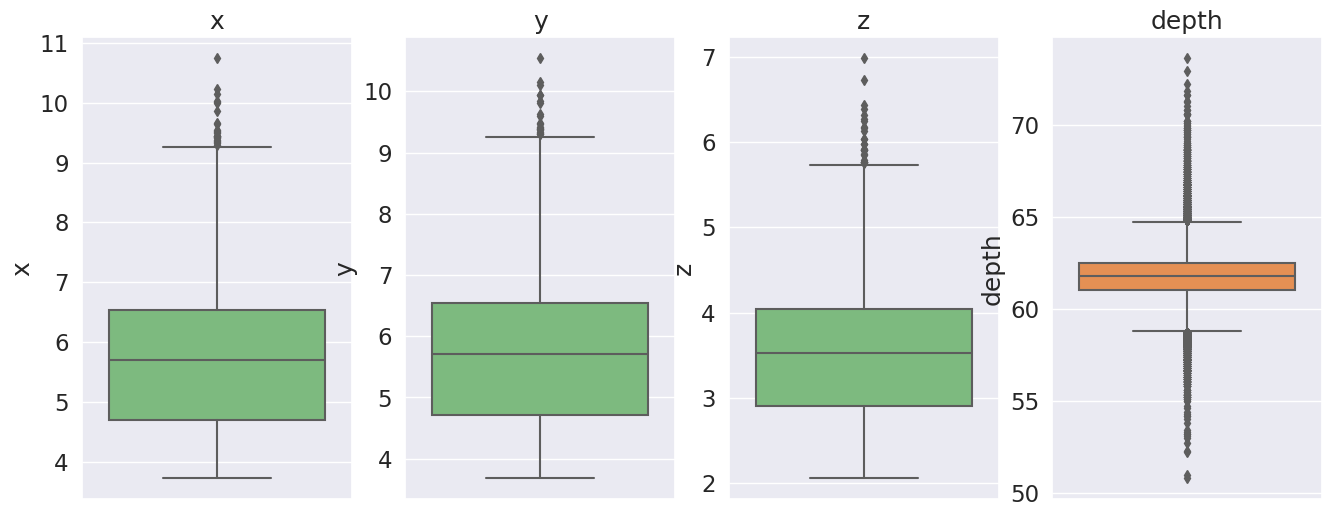

In [30]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,6))
idx = 0
for i in ['x', 'y', 'z', 'depth']:
    palet = ('Greens' if i in 'xyz' else 'Oranges')
    sns.boxplot(y=diamonds[i],palette=palet , ax=axes[idx], orient='v').set_title(i)
    idx += 1
plt.show()


Các outlier là bình thường, nhưng không thể để chúng ảnh hưởng tiêu cực đến mô hình của chúng ta. ít nhất chúng ta phải loại bỏ chúng đi rất xa.

Số 0 chắc chắn không được chấp nhận.

Loại bỏ số 0 trước và những số có độ sâu không khớp (khác lớn hơn 1)

In [31]:
diamonds['calc_depth'] = round(diamonds.z * 2 / (diamonds.x + diamonds.y) * 100,1)
diamonds.drop(diamonds[(diamonds.x == 0) | (diamonds.y == 0) |(diamonds.z == 0) |(diamonds.depth == 0)|(diamonds.y > 20)
                       | (diamonds.z > 10)| (diamonds.z < 1.1)].index, inplace=True)
diamonds.drop(diamonds[np.abs(diamonds.depth - diamonds.calc_depth) > 1].index, inplace=True)
diamonds.drop(columns='calc_depth', axis=1, inplace=True)
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,4,5,1,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,5,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,5,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,1,3,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,0,1,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,4,6,2,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,1,6,2,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,2,6,2,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,3,2,1,61.0,58.0,2757,6.15,6.12,3.74


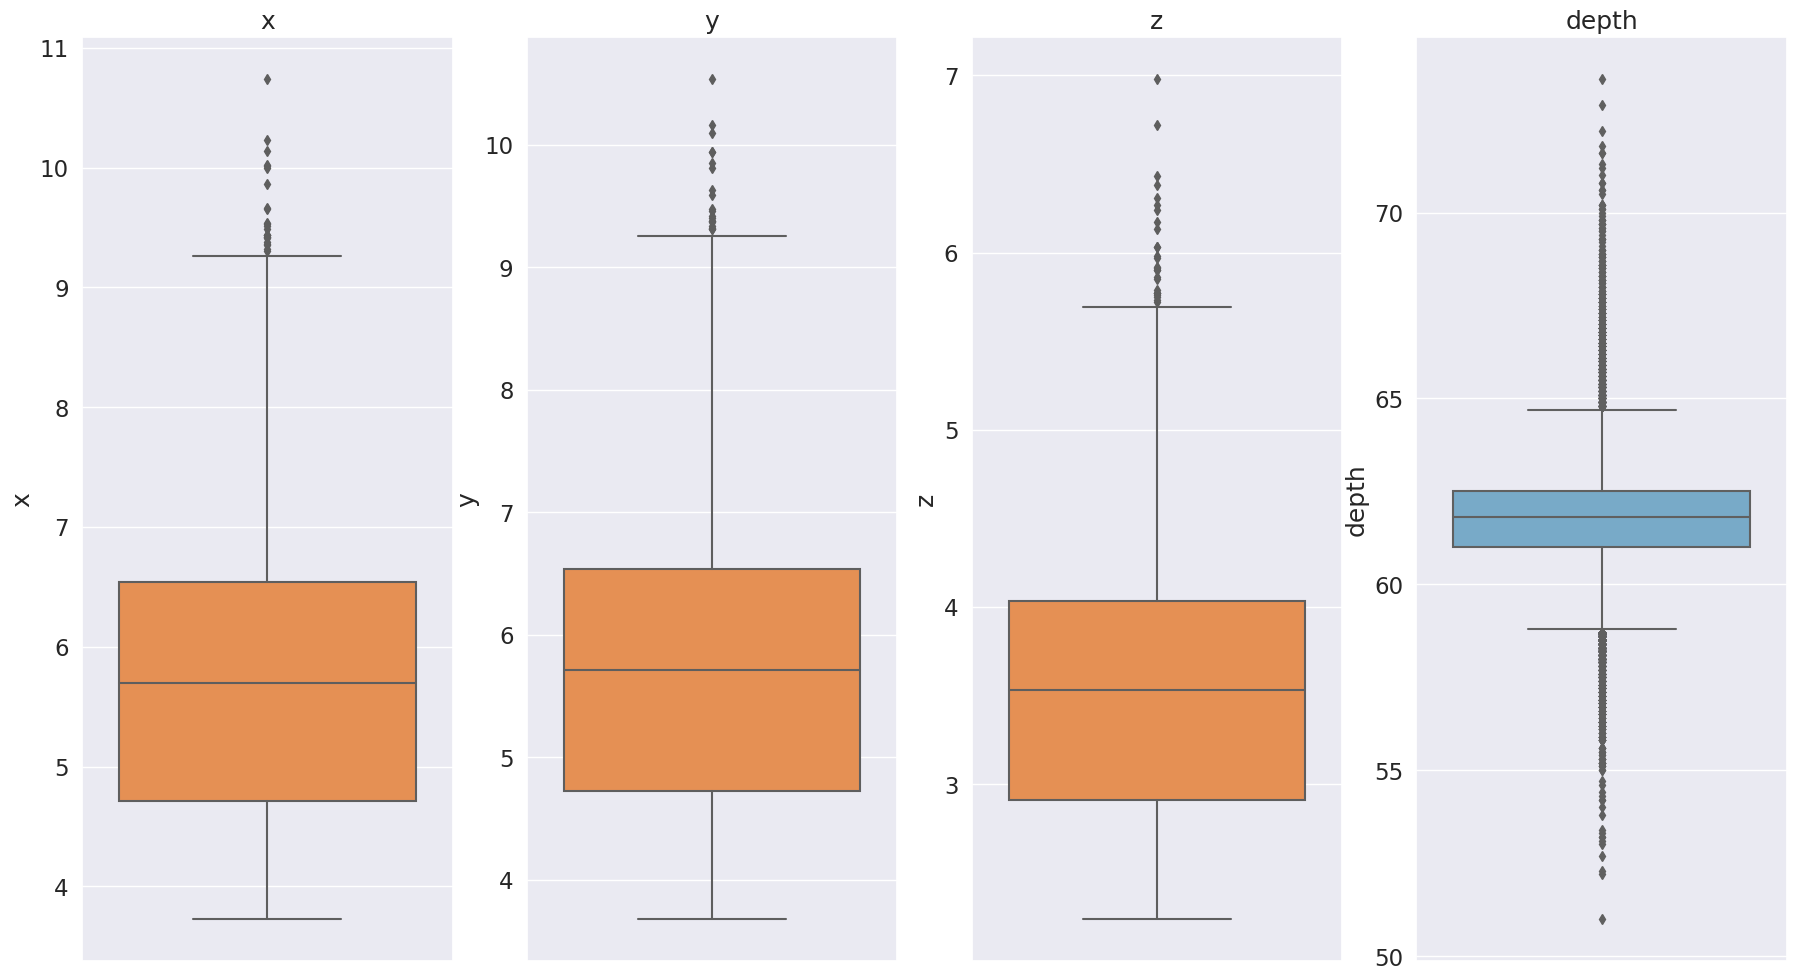

In [32]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(22,12))
idx = 0
for i in ['x', 'y', 'z', 'depth']:
    palet = ('Oranges' if i in 'xyz' else 'Blues')
    sns.boxplot(y=diamonds[i],palette=palet , ax=axes[idx]).set_title(i)
    idx += 1
plt.show()

Giờ đây, các thước đo tương thích hơn với độ sâu, ta thậm chí có thể loại bỏ các thuộc tính của độ sâu để tránh bất kỳ sự dư thừa nào (kết thúc quá trình EDA).

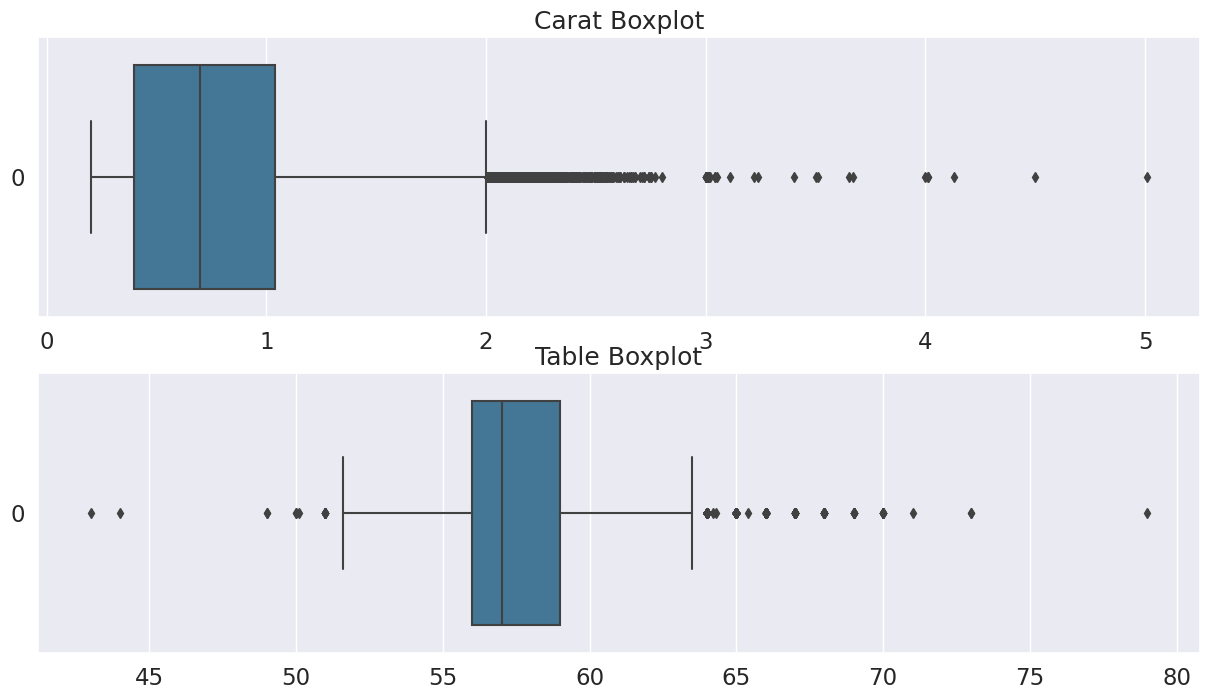

In [33]:
# Làm gì với features Carat và table?
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15,8), sharex=False, sharey=False)
sns.boxplot(diamonds['carat'],palette='mako' ,ax=axes[0], orient='h').set_title('Carat Boxplot')
sns.boxplot(diamonds['table'],palette='mako',ax=axes[1], orient='h').set_title('Table Boxplot')
plt.show()


Có quá nhiều giá trị outlier tính bằng carat và không có quá nhiều giá trị trong bảng. đếm các giá trị

In [34]:
carat_q1, carat_q3 = diamonds.carat.quantile(.25), diamonds.carat.quantile(.75)
table_q1, table_q3 = diamonds.table.quantile(.25) , diamonds.table.quantile(.75)

carat_upper = carat_q3 + (carat_q3 - carat_q1)*1.5
carat_lower = carat_q1 - (carat_q3 - carat_q1)*1.5

table_upper = table_q3 + (table_q3 - table_q1)*1.5
table_lower = table_q1 - (table_q3 - table_q1)*1.5

In [35]:
diamonds[(diamonds.carat>carat_upper)|(diamonds.carat<carat_lower)].count()[0]
# almost 3% .. let's consider it as a special pieces

1879

In [36]:
diamonds[(diamonds.table>table_upper)|(diamonds.table<table_lower)].count()[0]
# almost 1% .. let's consider it as a special pieces

598

<Axes: >

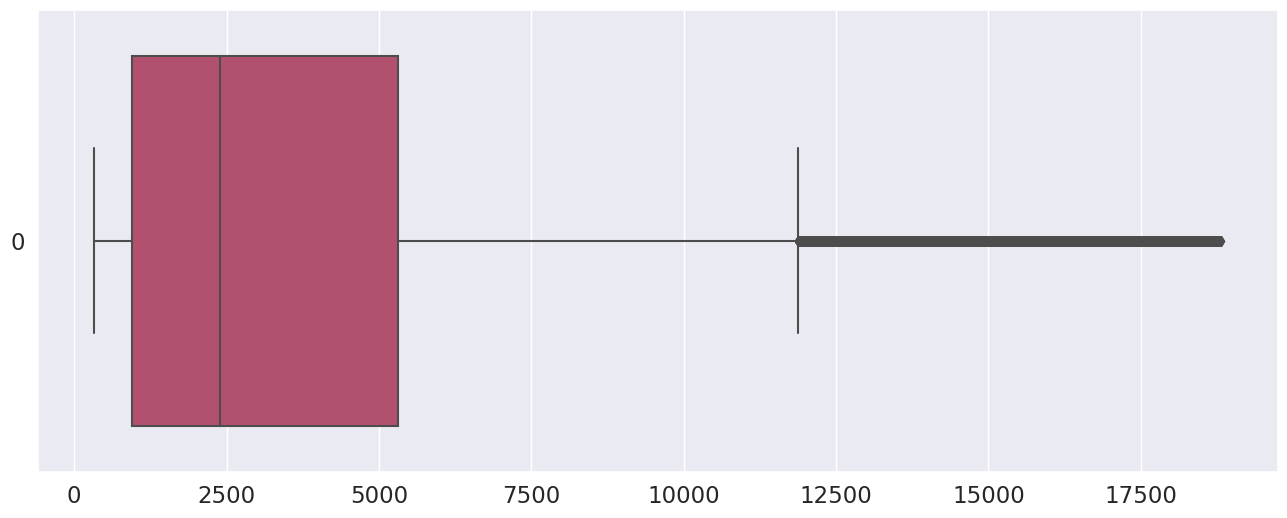

In [37]:
# Check giá
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(16,6), sharex=False, sharey=False)
sns.boxplot(diamonds['price'],palette='flare', orient='h')

In [38]:
price_q1, price_q3 = diamonds.price.quantile(.25) , diamonds.price.quantile(.75)
price_upper = price_q3 + (price_q3 - price_q1)*1.5
price_upper

11876.5

In [39]:
diamonds[diamonds.price > price_upper]

,carat,cut,color,clarity,depth,table,price,x,y,z
23815,1.50,3,4,2,62.9,59.0,11878,7.34,7.29,4.60
23816,1.50,2,1,4,63.3,54.0,11879,7.26,7.33,4.62
23817,1.22,4,4,5,62.7,54.0,11880,6.79,6.84,4.27
23818,1.20,4,5,5,61.5,57.0,11883,6.79,6.89,4.21
23819,1.83,3,1,2,62.9,55.0,11883,7.90,7.78,4.93
...,...,...,...,...,...,...,...,...,...,...
27745,2.00,2,2,2,62.8,57.0,18803,7.95,8.00,5.01
27746,2.07,4,3,1,62.5,55.0,18804,8.20,8.13,5.11
27747,1.51,4,3,7,61.7,55.0,18806,7.37,7.41,4.56
27748,2.00,2,3,2,63.5,56.0,18818,7.90,7.97,5.04


##Visualization encoding

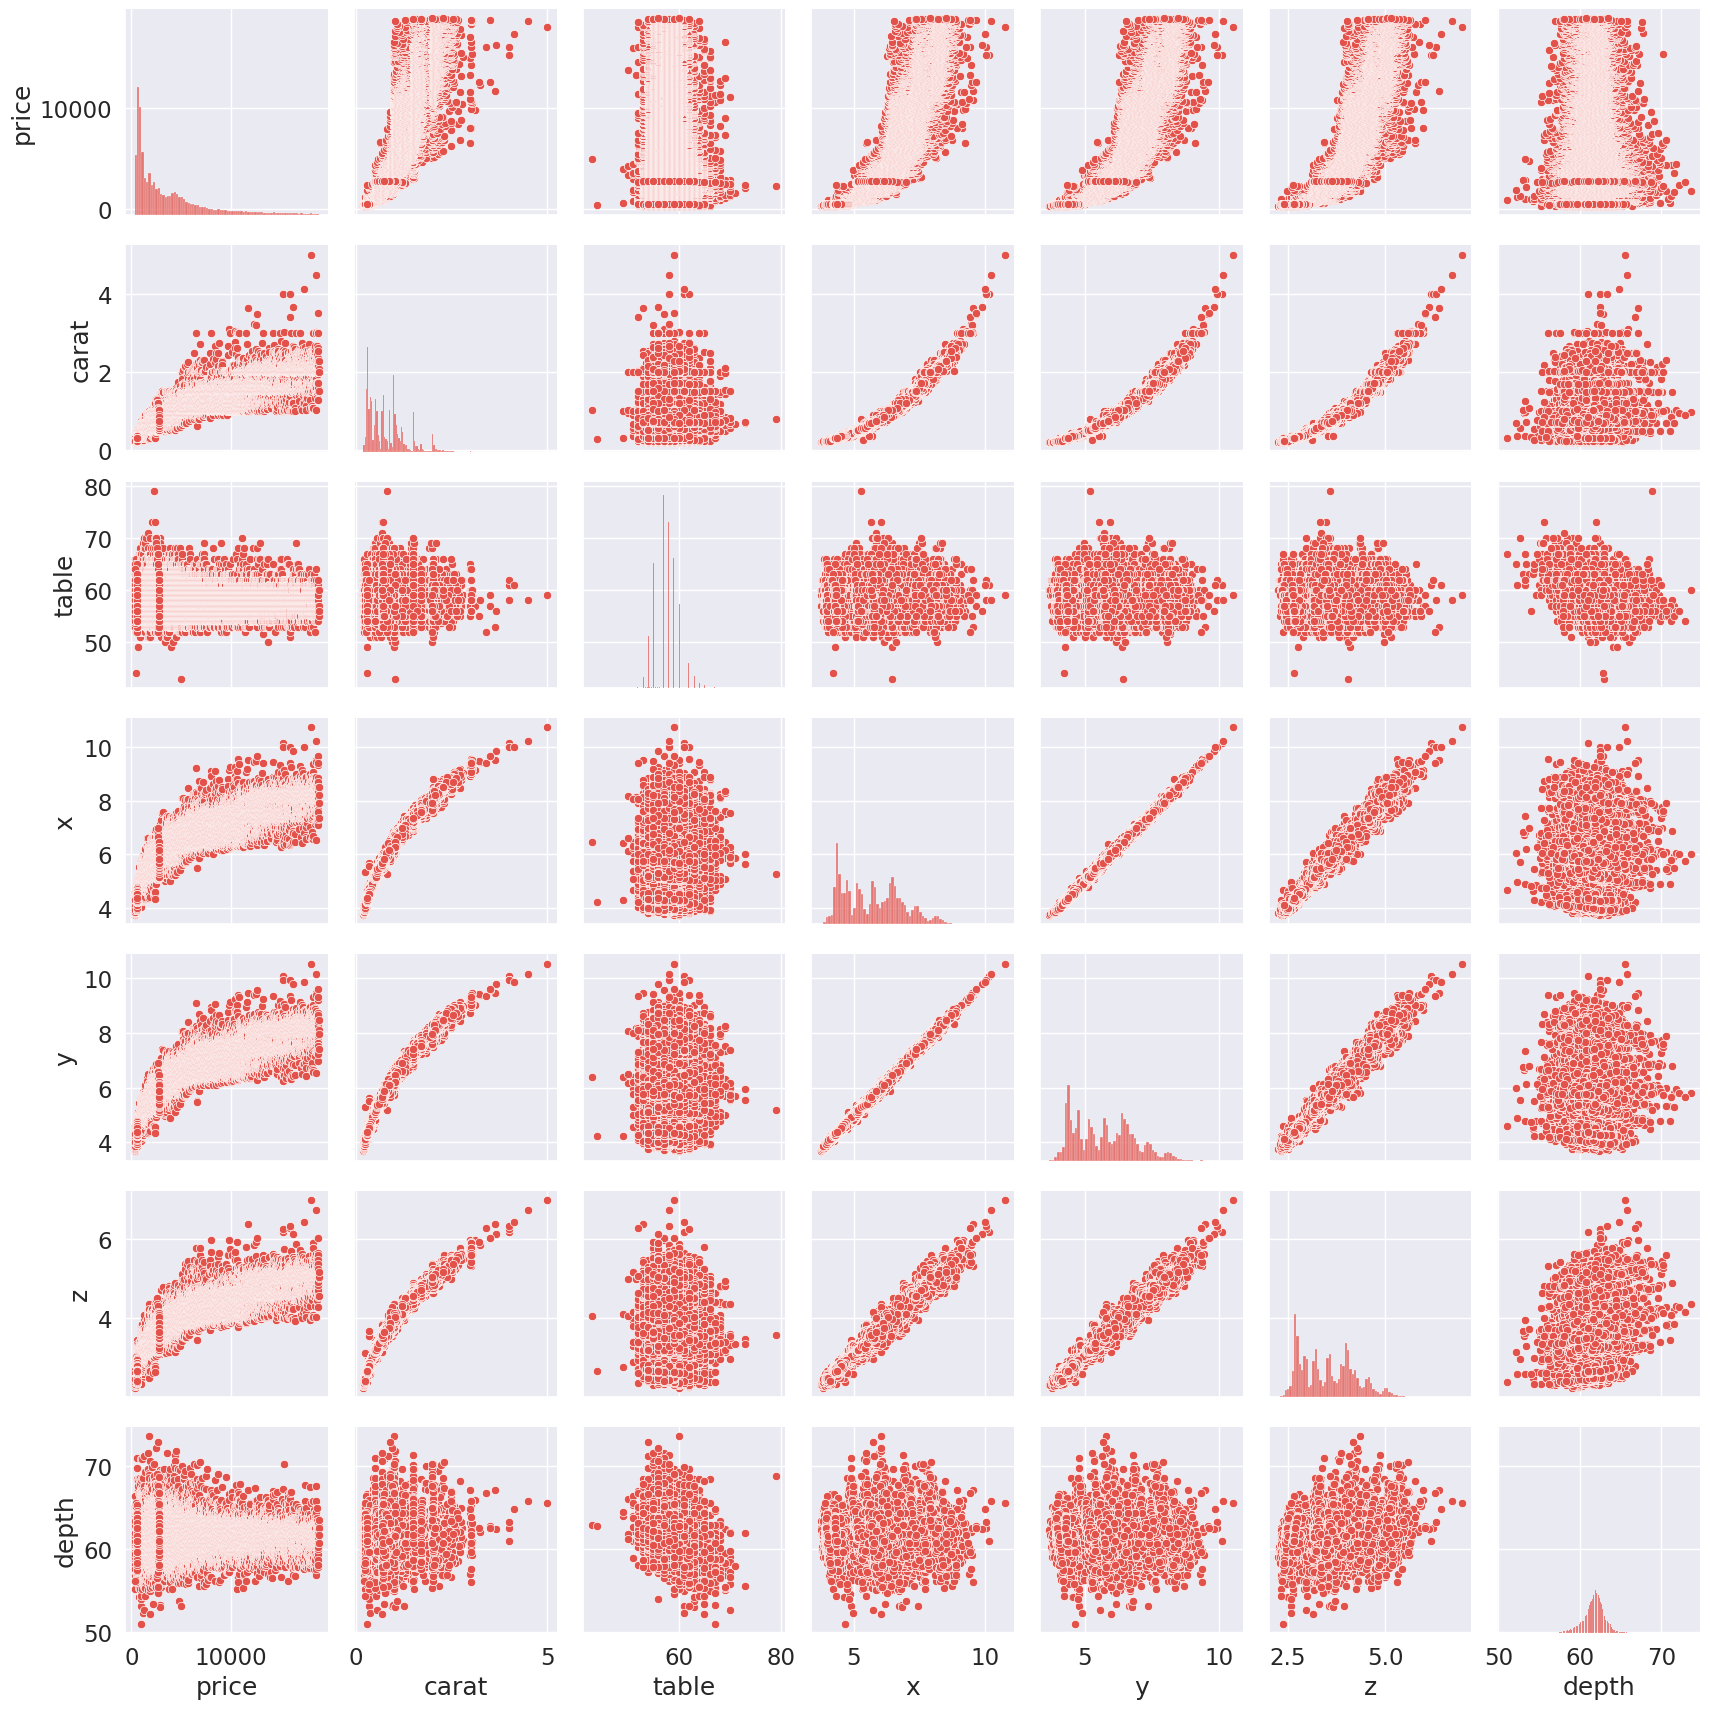

In [40]:
num_col = ['carat', 'table', 'x','y','z', 'depth']
cat_col = ['cut', 'color', 'clarity']
sns.pairplot(data=diamonds[['price']+num_col])

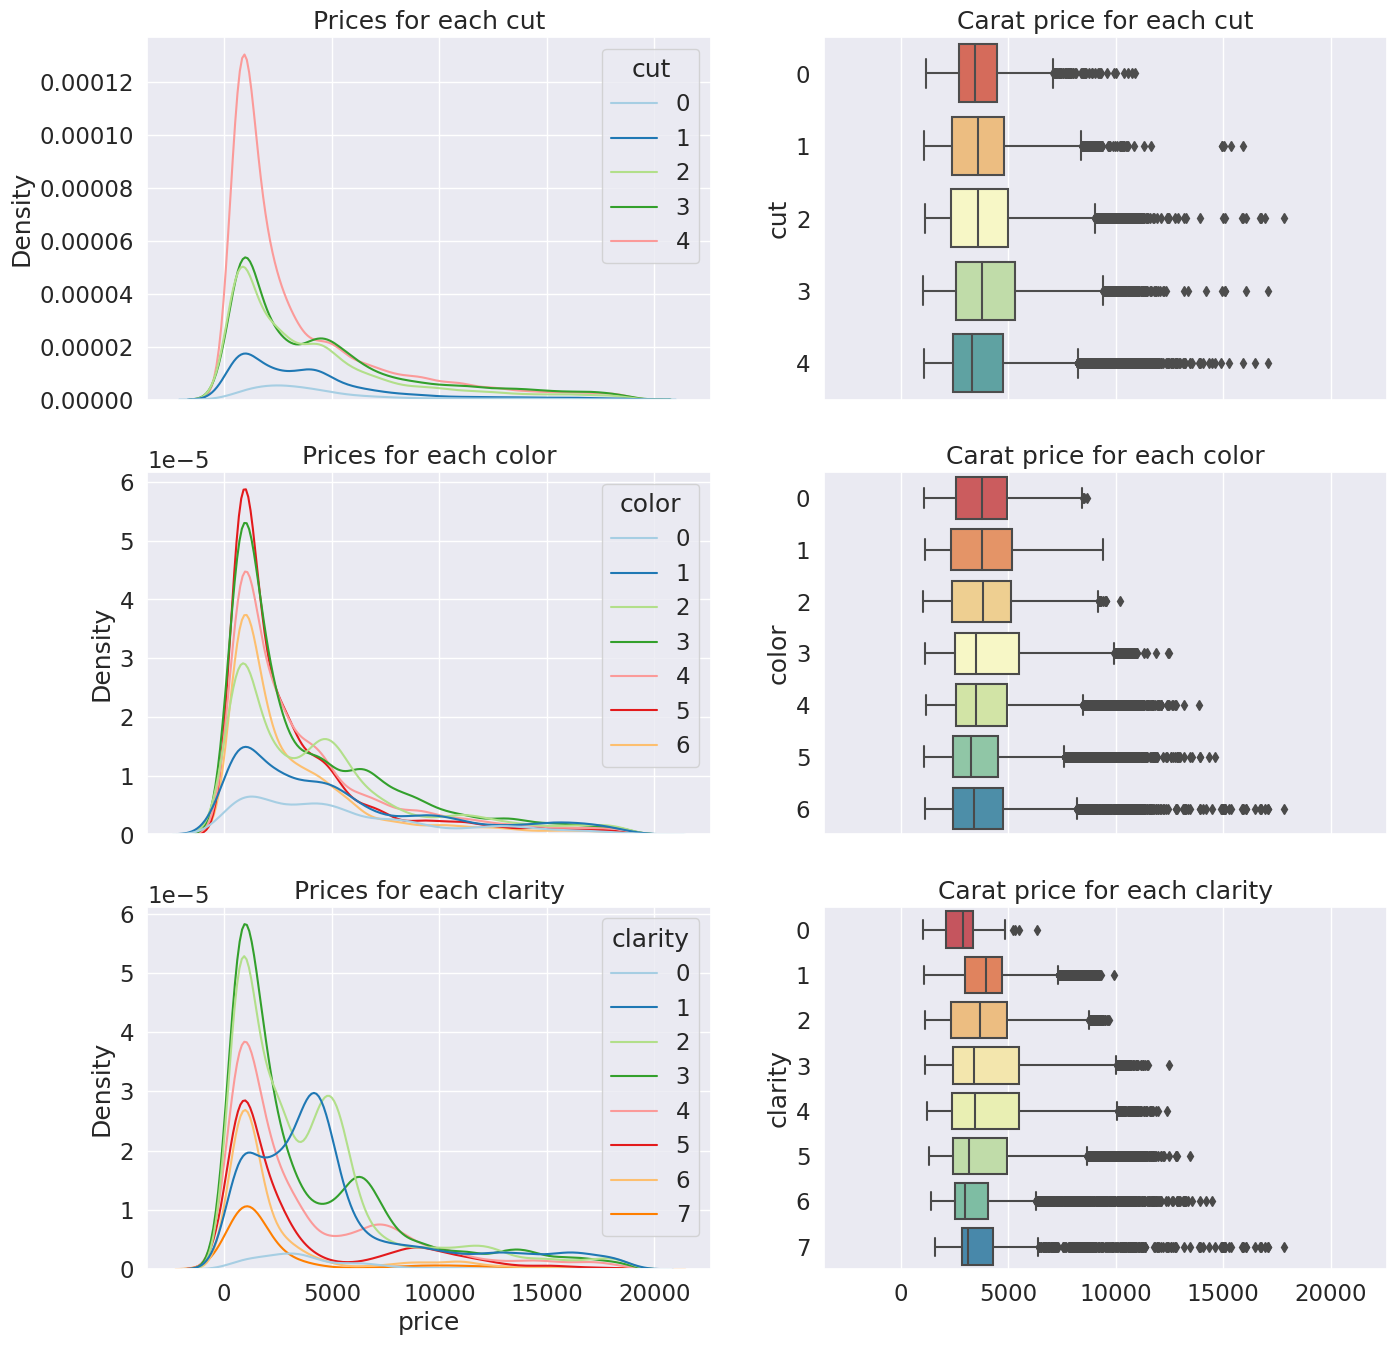

In [41]:
fig, axes = plt.subplots(nrows=len(cat_col), ncols=2,figsize=(16,16), sharex=True)
for i in range(len(cat_col)):
    sns.kdeplot(data=diamonds, x='price', hue=cat_col[i], palette='Paired', ax=axes[i][0]).set_title(f'Prices for each {cat_col[i]}')
    sns.boxplot(data =diamonds, y=cat_col[i] , x=diamonds['price']/diamonds['carat'], palette='Spectral', ax=axes[i][1]).set_title(f'Carat price for each {cat_col[i]}')

OK, giác cắt tốt hơn có giá tốt hơn, màu sắc giống nhau, màu sắc tốt hơn có giá tốt hơn, nhưng độ rõ nét ..

Không rõ những features này ảnh hưởng đến giá bao nhiêu, vì nó có rất nhiều outliers, vì vậy hãy xem một dạng biểu đồ khác

chia các đặc điểm này theo carat (để chỉ ra các đặc điểm kích thước khác)

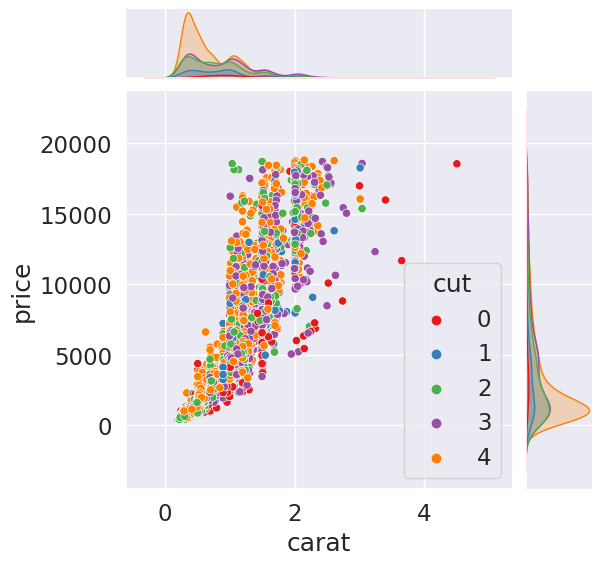

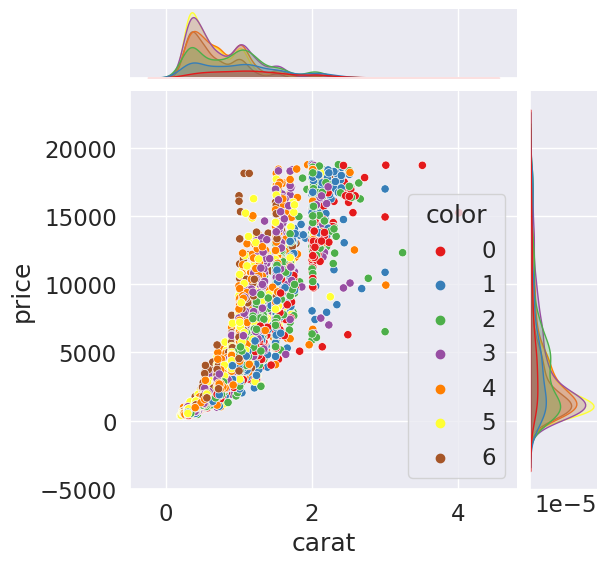

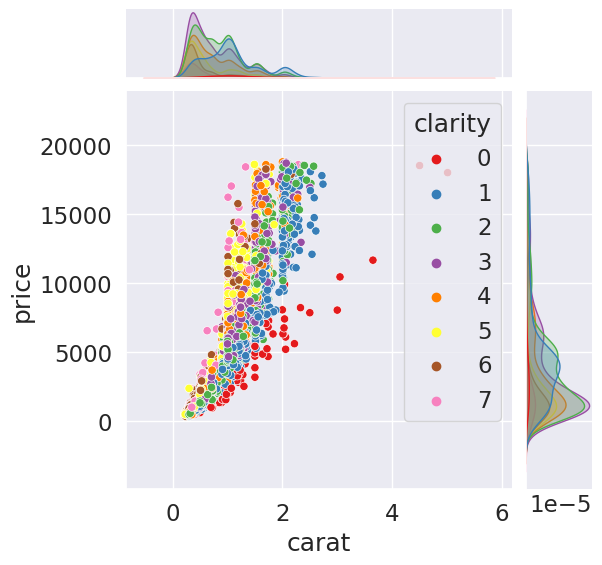

In [42]:
for i in range(len(cat_col)):
    sns.jointplot(data=diamonds.sample(8000),  x='carat',y='price', hue=cat_col[i], palette='Set1', height=6)

Bây giờ đã rõ, giác cắt càng tốt và chất lượng thì giá càng cao, màu sắc cũng tinh khiết nhất, độ trong cũng cao hơn

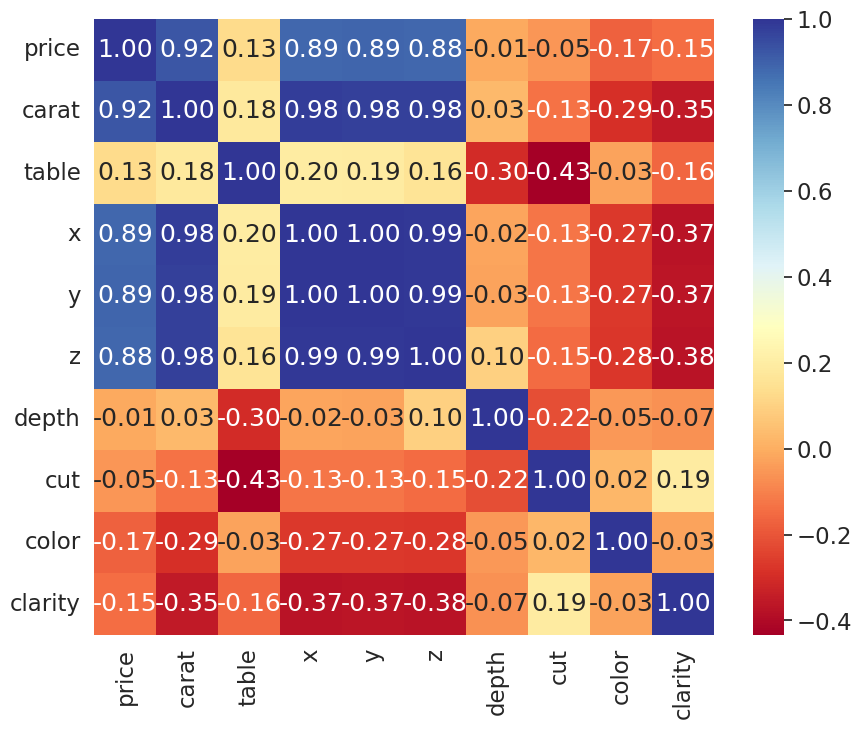

In [43]:
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(10,8))
sns.heatmap(pd.concat([diamonds['price'], diamonds[num_col], diamonds[cat_col].astype('int')], axis=1).corr(), cmap="RdYlBu", annot=True, fmt=".02f")
plt.show()

Có vẻ như Giá chỉ bị ảnh hưởng bởi x, y, z và carat. và không bị ảnh hưởng bởi bất kỳ features nào khác

In [44]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,4,5,1,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,5,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,5,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,1,3,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,0,1,63.3,58.0,335,4.34,4.35,2.75


## Train Model

In [45]:
diamondX = diamonds.drop(columns='price')
diamondY = diamonds['price']
xtrain, xtest, ytrain, ytest = train_test_split(diamondX, diamondY, test_size=0.3)
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((37690, 9), (16154, 9), (37690,), (16154,))

In [46]:
pipe1 = Pipeline([('scaler',StandardScaler()), ('linearReg', LinearRegression())])
pipe2 = Pipeline([('scaler',StandardScaler()), ('LassoReg', Lasso())])
pipe3 = Pipeline([('scaler',StandardScaler()), ('RidgeReg', Ridge())])
pipe4 = Pipeline([('scaler',StandardScaler()), ('SGDReg', SGDRegressor())])
pipe5 = Pipeline([('scaler',StandardScaler()), ('RFReg', RandomForestRegressor())])
pipe6 = Pipeline([('scaler',StandardScaler()), ('DTReg', DecisionTreeRegressor())])
pipe7 = Pipeline([('scaler',StandardScaler()), ('KNNReg', KNeighborsRegressor())])
pipe8 = Pipeline([('scaler',StandardScaler()), ('XGBReg', XGBRegressor())])

In [47]:
myPipes = [pipe1,pipe2,pipe3,pipe4,pipe5,pipe6,pipe7,pipe8]
ypreds = []
for pipe in myPipes:
    start_time = np.datetime64('now')
    pipe.fit(xtrain,ytrain)
    ypreds.append(pipe.predict(xtest))
    period = pd.Timedelta(np.datetime64('now')-start_time).total_seconds()
    modelname = str(pipe[-1]).split('(')[0]
    print(f'fitting model {modelname} took {period} seconds', '\n', '-'*50)

fitting model LinearRegression took 0.0 seconds 
 --------------------------------------------------
fitting model Lasso took 0.0 seconds 
 --------------------------------------------------
fitting model Ridge took 0.0 seconds 
 --------------------------------------------------
fitting model SGDRegressor took 1.0 seconds 
 --------------------------------------------------
fitting model RandomForestRegressor took 23.0 seconds 
 --------------------------------------------------
fitting model DecisionTreeRegressor took 0.0 seconds 
 --------------------------------------------------
fitting model KNeighborsRegressor took 1.0 seconds 
 --------------------------------------------------
fitting model XGBRegressor took 1.0 seconds 
 --------------------------------------------------


##Conclusion


 ============================== by using metric of mean_absolute_error ============================== 

LinearRegression 	 : 797.9021448431488
           Lasso 	 : 799.3596771511077
           Ridge 	 : 797.9147296933594
    SGDRegressor 	 : 801.7229669304288
RandomForestRegressor 	 : 272.12598150391767
DecisionTreeRegressor 	 : 361.26479509718956
KNeighborsRegressor 	 : 382.167265073666
    XGBRegressor 	 : 277.7754468333386


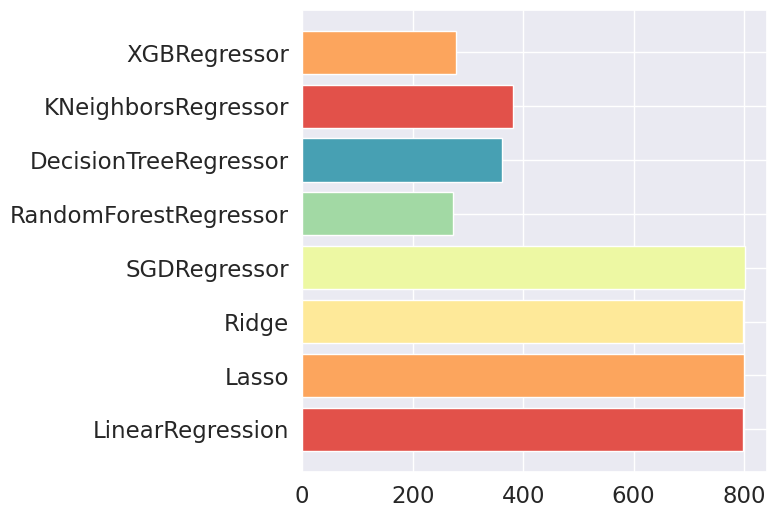


 ============================== by using metric of mean_squared_error =============================== 

LinearRegression 	 : 1426880.201252947
           Lasso 	 : 1446257.2829890575
           Ridge 	 : 1427640.1140491588
    SGDRegressor 	 : 1457609.939725989
RandomForestRegressor 	 : 296263.3753930282
DecisionTreeRegressor 	 : 555353.7853008542
KNeighborsRegressor 	 : 519237.3482976352
    XGBRegressor 	 : 291727.2612826998


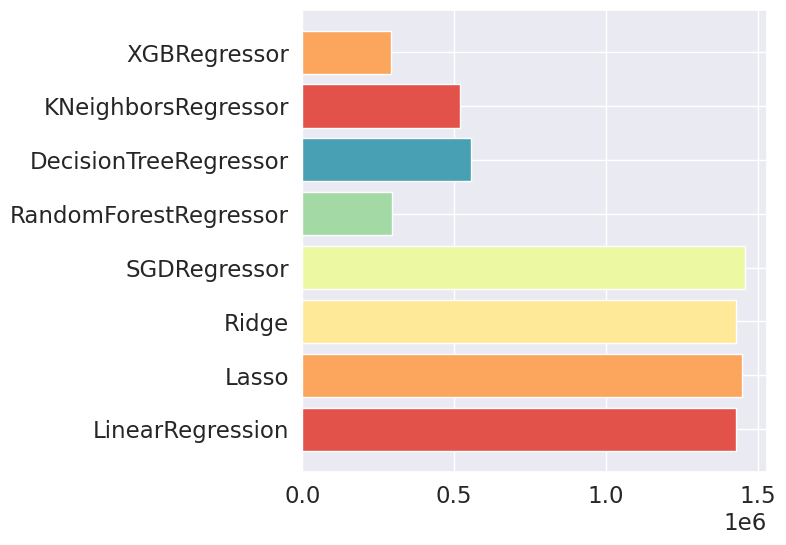


 =================================== by using metric of r2_score ==================================== 

LinearRegression 	 : 0.8992167736352824
           Lasso 	 : 0.8975176303901469
           Ridge 	 : 0.8991264245937368
    SGDRegressor 	 : 0.8991855244082787
RandomForestRegressor 	 : 0.9810384369529499
DecisionTreeRegressor 	 : 0.9651823447085145
KNeighborsRegressor 	 : 0.9656272478019698
    XGBRegressor 	 : 0.9815299529794161


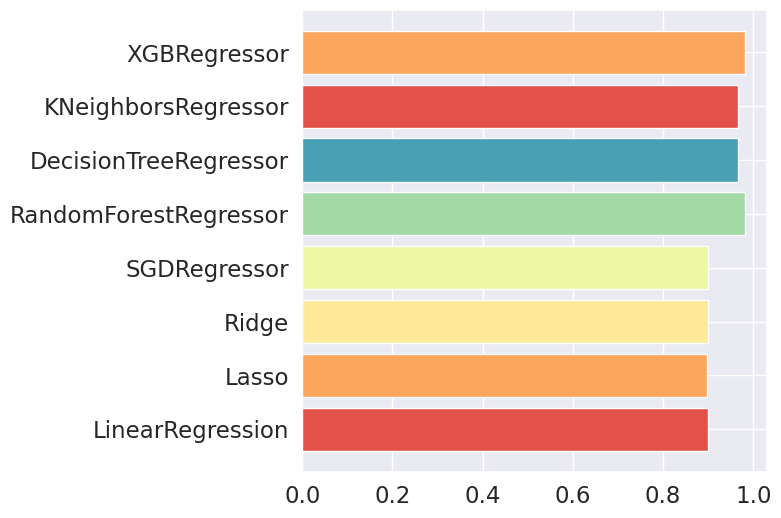

In [48]:
results = dict
for i in [mean_absolute_error, mean_squared_error, r2_score]:
    plt.subplots(figsize=(6,6))
    metric_name = str(i).split()[1]
    print('\n',f' by using metric of {metric_name} '.center(100,'='),'\n')
    for j in range(len(myPipes)):
        score=i(ypreds[j],ytest)
        modelname = str(myPipes[j][-1]).split('(')[0]
        print(modelname.rjust(16),'\t :', score)
        plt.barh(modelname,score)
    plt.show()

>(mean_absolute) sai số trung bình tuyệt đối,
mean_squared (sai số bình phương trung bình).

 Giá trị càng thấp cho thấy mô hình dự đoán tốt hơn và có sai số tuyệt đối nhỏ hơn so với giá trị thực tế.
>R bình phương là một phép đo cho biết tỷ lệ phương sai của biến phụ thuộc được giải thích bởi mô hình. Giá trị càng gần 1 cho thấy mô hình phù hợp tốt với dữ liệu.
Vì vậy, RandomForest hoặc XGBoost có số liệu tốt nhất (r bình phương lớn hơn (98,1%) và lỗi nhỏ hơn)
Nhưng bằng cách xem xét hiệu suất tốt hơn
> Chọn hồi quy XGBoost